## Understanding Principal Component Analysis and Its Application in Data Science

### Reza Bagheri

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import math as mt
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import scipy.stats as stats
from sklearn.datasets import fetch_openml
from matplotlib import cm
from scipy.stats import multivariate_normal

%matplotlib inline

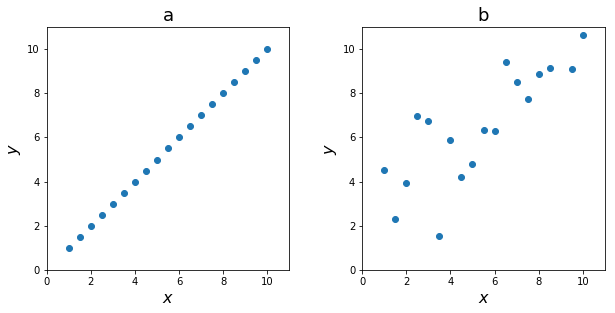

In [2]:
np.random.seed(0)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
plt.subplots_adjust(wspace=0.3)

x = np.linspace(1, 10, 19)
y = x

ax1.scatter(x, y)
ax1.set_xlim([0, 11])
ax1.set_ylim([0, 11])
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_aspect('equal')
ax1.set_title("a", fontsize=18)

x1 = np.linspace(1, 10, 19)
y1 = np.linspace(1, 10, 19) + np.random.normal(0, 2, 19)

ax2.scatter(x1, y1)
ax2.set_xlim([0, 11])
ax2.set_ylim([0, 11])
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
ax2.set_aspect('equal')
ax2.set_title("b", fontsize=18)

plt.show()

### Covariance

In [3]:
np.corrcoef(x, y)

array([[1., 1.],
       [1., 1.]])

In [65]:
np.random.seed(0)
x = np.linspace(1, 10, 19)
y = np.linspace(1, 10, 19) + np.random.normal(0, 2, 19)

np.round(np.corrcoef(x, y), 3)

array([[1.   , 0.826],
       [0.826, 1.   ]])

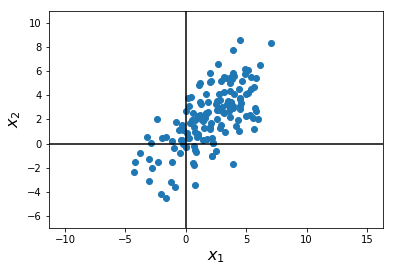

In [5]:
np.random.seed(0)
mu = [2, 2]
Sigma = [[6, 4],
         [4, 6]]
points = np.random.multivariate_normal(mu, Sigma, 150)
x1, x2 = points.T

plt.scatter(x1, x2)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.axis('equal')
plt.xlim([-5, 10])
plt.ylim([-7, 11])
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)

plt.show()

In [6]:
mean = np.array([x1.mean(), x2.mean()])

In [7]:
mean

array([1.98407831, 2.15752234])

### Variance of random vectors

In [8]:
u1 = np.array([[1/np.sqrt(2)],[1/np.sqrt(2)]])
u2 = np.array([[-1/np.sqrt(2)],[1/np.sqrt(2)]])

projected_points1 = np.dot(points, u1).T 
var_X_u1 = np.var(projected_points1[0])
projected_points2 = np.dot(points, u2).T 
var_X_u2 = np.var(projected_points2[0])

print("Variance of X along u1", round(var_X_u1, 3))
print("Variance of X along u2", round(var_X_u2, 3))

Variance of X along u1 10.169
Variance of X along u2 1.958


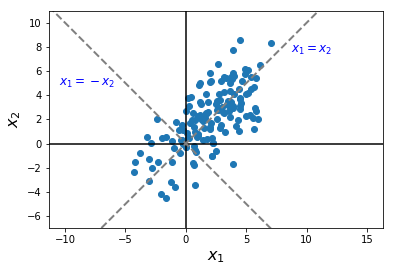

In [9]:
plt.scatter(x1, x2)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.axis('equal')
plt.xlim([-5, 10])
plt.ylim([-7, 11])
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
plt.plot([-12, 12], [-12, 12], color='grey', linewidth=2, linestyle='--')
plt.plot([-12, 12], [12, -12], color='grey', linewidth=2, linestyle='--')
plt.text(8.7, 7.5, "$x_1=x_2$", color='b', fontsize=12, weight="bold", style="italic")
plt.text(-10.5, 4.8, "$x_1=-x_2$", color='b', fontsize=12)

plt.show()

### Covariance matrix

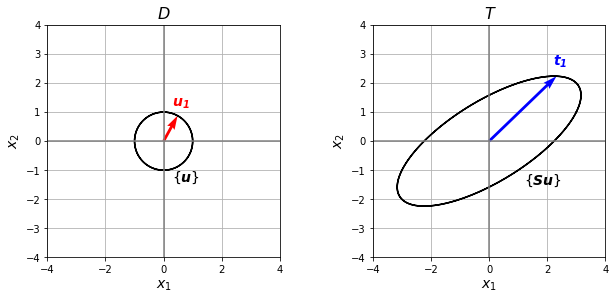

In [10]:
theta = np.linspace(-2*np.pi, 2*np.pi, 1000)
xi = np.cos(theta)
yi = np.sin(theta)

d = np.vstack((xi, yi))

# getting a sample vector from d
d_sample1 = d[:, 85]

S = np.array([[3, 1],
              [1, 2]]) 

t = S @ d  # Vectors in t are the transformed vectors of d

t_sample1 = t[:, 85]

origin = [0], [0] # origin point
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting D
ax1.plot(d[0,:], d[1,:], color='black')
ax1.quiver(*origin, d_sample1[0], d_sample1[1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('$x_1$', fontsize=14)
ax1.set_ylabel('$x_2$', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("D",style='italic', fontsize=16)
ax1.axhline(y=0, color='grey')
ax1.axvline(x=0, color='grey')
ax1.text(0.3, 1.2, "$\mathregular{u_1}$", color='r', fontsize=14, weight="bold", style="italic")
ax1.text(0.3, -1.4, "$\{\mathregular{u}\}$", color='black', fontsize=14, weight="bold", style="italic")

# Plotting T
ax2.plot(t[0, :], t[1, :], color='black')
ax2.quiver(*origin, t_sample1[0], t_sample1[1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)

ax2.set_xlabel('$x_1$', fontsize=14)
ax2.set_ylabel('$x_2$', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("T",style='italic',  fontsize=16)
ax2.axhline(y=0, color='grey')
ax2.axvline(x=0, color='grey')
ax2.text(2.2, 2.6, "$\mathregular{t_1}$", color='b', fontsize=14, weight="bold", style="italic")
ax2.text(1.2, -1.5, "$\{\mathregular{Su}\}$", color='black', fontsize=14, weight="bold", style="italic")

plt.show()

In [11]:
S = np.array([[3, 1],
              [1, 2]]) 
lam, v = LA.eig(S)
lam, v

(array([3.61803399, 1.38196601]), array([[ 0.85065081, -0.52573111],
        [ 0.52573111,  0.85065081]]))

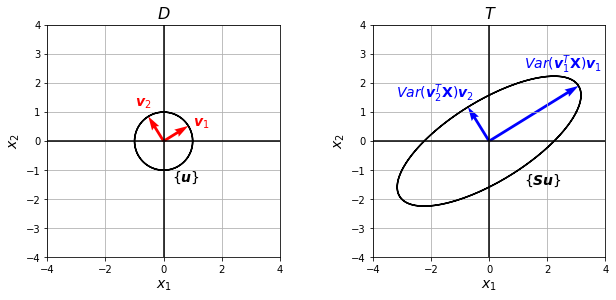

In [12]:
theta = np.linspace(-2*np.pi, 2*np.pi, 1000)
xi = np.cos(theta)
yi = np.sin(theta)

d = np.vstack((xi, yi))


S = np.array([[3, 1],
              [1, 2]]) 

lam, v = LA.eig(S)

t = S @ d  # Vectors in t are the transformed vectors of d

origin = [0], [0] # origin point
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
plt.subplots_adjust(wspace=0.4)

# Plotting D
ax1.plot(d[0,:], d[1,:], color='black')
ax1.quiver(*origin, v[0,0], v[1,0], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, v[0,1], v[1,1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('$x_1$', fontsize=14)
ax1.set_ylabel('$x_2$', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("D",style='italic',  fontsize=16)
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.5, "$\mathregular{v}_1$", color='r', fontsize=14, weight="bold", style="italic")
ax1.text(-1, 1.2, "$\mathregular{v}_2$", color='r', fontsize=14, weight="bold", style="italic")
ax1.text(0.3, -1.4, "$\{\mathregular{u}\}$", color='black', fontsize=14, weight="bold", style="italic")

# Plotting T
ax2.plot(t[0, :], t[1, :], color='black')
ax2.quiver(*origin, lam[0] * v[0,0], lam[0] * v[1,0], color=['blue'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, lam[1] * v[0,1], lam[1] * v[1,1], color=['blue'], width=0.012, angles='xy', scale_units='xy', scale=1)

ax2.set_xlabel('$x_1$', fontsize=14)
ax2.set_ylabel('$x_2$', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title("T",style='italic',  fontsize=16)
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1.2, 2.5, "$Var(\mathregular{v}_1^T\mathbf{X})\mathregular{v}_1$",
         color='blue', fontsize=14, weight="bold", style="italic")
ax2.text(-3.2, 1.5, "$Var(\mathregular{v}_2^T\mathbf{X})\mathregular{v}_2$",
         color='blue', fontsize=14, weight="bold", style="italic")
ax2.text(1.2, -1.5, "$\{\mathregular{Su}\}$", color='black', fontsize=14, weight="bold", style="italic")

plt.show()

### Design matrix

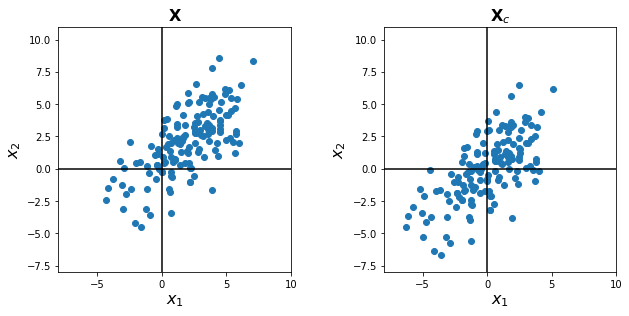

In [13]:
np.random.seed(0)
mu = [2, 2]
Sigma = [[6, 4],
         [4, 6]]
points = np.random.multivariate_normal(mu, Sigma, 150)
x1, x2 = points.T

Xtil = points - points.mean(axis=0)
xc1, xc2 = Xtil.T

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
plt.subplots_adjust(wspace=0.4)

ax1.scatter(x1, x2)
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.set_xlim([-8, 10])
ax1.set_ylim([-8, 11])
ax1.set_xlabel("$x_1$", fontsize=16)
ax1.set_ylabel("$x_2$", fontsize=16)
ax1.set_aspect('equal')
ax1.set_title("$\mathbf{X}$", fontsize=16)

ax2.scatter(xc1, xc2)
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.set_xlim([-8, 10])
ax2.set_ylim([-8, 11])
ax2.set_xlabel("$x_1$", fontsize=16)
ax2.set_ylabel("$x_2$", fontsize=16)
ax2.set_aspect('equal')
ax2.set_title("$\mathbf{X}_c$", fontsize=16)

plt.show()

In [14]:
S = (1/(Xtil.shape[0]-1)) * Xtil.T @ Xtil 
S

array([[5.81736517, 4.13318634],
       [4.13318634, 6.39086118]])

In [15]:
S = np.cov(Xtil.T)
S

array([[5.81736517, 4.13318634],
       [4.13318634, 6.39086118]])

In [16]:
lam, v = LA.eig(S)
print('eigenvalues=', lam)
print('eigenvectors=', v)  # each column is an eigenvector

eigenvalues= [ 1.96099192 10.24723443]
eigenvectors= [[-0.73116709 -0.68219842]
 [ 0.68219842 -0.73116709]]


In [17]:
Xtil_v1 = np.dot(Xtil, v[:,0])
Xtil_v2 = np.dot(Xtil, v[:,1])
print("v1 coordinates=", Xtil_v1[:10])
print("v2 coordinates=", Xtil_v2[:10])

v1 coordinates= [ 0.63962439  3.15526738 -1.29586127 -0.22899389  0.44992067  1.95208948
  0.13619991  0.40110269 -0.24546895 -1.29197232]
v2 coordinates= [ 5.65979639  3.08776513  6.05436485  3.11436688 -0.242004    0.48833218
  2.50352458  1.4907509   4.83621938  1.13555066]


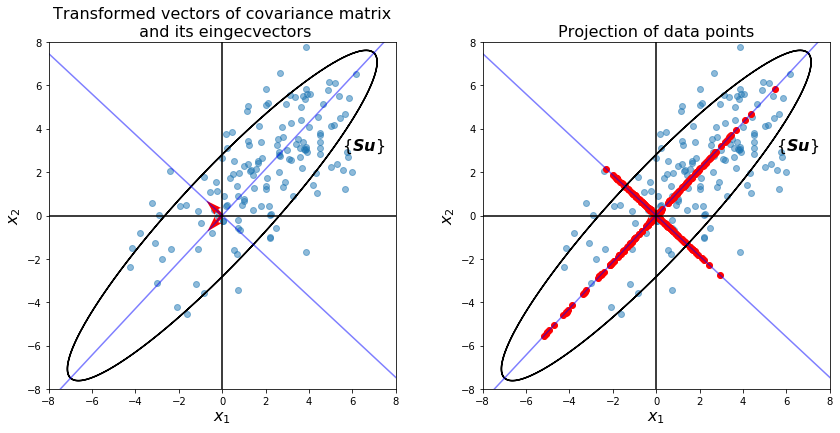

In [18]:
theta = np.linspace(-2*np.pi, 2*np.pi, 1000)
xi = np.cos(theta)
yi = np.sin(theta)

d = np.vstack((xi, yi))

lam, v = LA.eig(S)

t = S @ d  # Vectors in t are the transformed vectors of d

origin = [0], [0] # origin point
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,15))

plt.subplots_adjust(wspace=0.25)

# Plot 1 
ax1.scatter(x1, x2, alpha=0.5)
ax1.plot(t[0, :], t[1, :], color='black')
ax1.plot([-12*v[0,0], 12*v[0,0]], [-12*v[1,0], 12*v[1,0]], color='blue', alpha=0.5)
ax1.plot([-12*v[0,1], 12*v[0,1]], [-12*v[1,1], 12*v[1,1]], color='blue', alpha=0.5)
ax1.quiver(*origin,  v[0,0], v[1,0], color=['red'], width=0.009, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin,  v[0,1], v[1,1], color=['red'], width=0.009, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel("$x_1$", fontsize=16)
ax1.set_ylabel("$x_2$", fontsize=16)
ax1.set_xlim([-8, 8])
ax1.set_ylim([-8, 8])
ax1.set_aspect('equal')
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.set_title("Transformed vectors of covariance matrix\n and its eingecvectors", fontsize=16)
ax1.text(5.5, 3, "$\{\mathregular{Su}\}$", color='black', fontsize=16, weight="bold", style="italic")

# Plot 2 
ax2.scatter(x1, x2, alpha=0.5)
ax2.plot(t[0, :], t[1, :], color='black')
ax2.plot([-12*v[0,0], 12*v[0,0]], [-12*v[1,0], 12*v[1,0]], color='blue', alpha=0.5)
ax2.plot([-12*v[0,1], 12*v[0,1]], [-12*v[1,1], 12*v[1,1]], color='blue', alpha=0.5)
ax2.quiver(*origin,  v[0,0], v[1,0], color=['red'], width=0.009, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin,  v[0,1], v[1,1], color=['red'], width=0.009, angles='xy', scale_units='xy', scale=1)

projected_points1 = np.dot(Xtil, v[:,0]) * v[:,0].reshape(2,1)
projected_points2 = np.dot(Xtil, v[:,1]) * v[:,1].reshape(2,1) 
ax2.scatter(projected_points1[0, :], projected_points1[1, :], color='red')
ax2.scatter(projected_points2[0, :], projected_points2[1, :], color='red')

ax2.set_xlabel("$x_1$", fontsize=16)
ax2.set_ylabel("$x_2$", fontsize=16)
ax2.set_xlim([-8, 8])
ax2.set_ylim([-8, 8])
ax2.set_aspect('equal')
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.set_title("Projection of data points", fontsize=16)
ax2.text(5.5, 3, "$\{\mathregular{Su}\}$", color='black', fontsize=16, weight="bold", style="italic")

plt.show()

In [19]:
pca = PCA(n_components=2)
pca.fit(points)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
pca.explained_variance_

array([10.24723443,  1.96099192])

In [21]:
pca.components_

array([[ 0.68219842,  0.73116709],
       [ 0.73116709, -0.68219842]])

In [22]:
pca.transform(points)[:10,:]

array([[-5.65979639, -0.63962439],
       [-3.08776513, -3.15526738],
       [-6.05436485,  1.29586127],
       [-3.11436688,  0.22899389],
       [ 0.242004  , -0.44992067],
       [-0.48833218, -1.95208948],
       [-2.50352458, -0.13619991],
       [-1.4907509 , -0.40110269],
       [-4.83621938,  0.24546895],
       [-1.13555066,  1.29197232]])

In [23]:
Xtil[0]

array([-4.32877648, -3.70190609])

In [24]:
np.sum(pca.transform(points)[0,:] * pca.components_, axis =1)

array([-4.32877648, -3.70190609])

### The rank of the covariance matrix

In [25]:
x = np.linspace(1, 5, 5)
y = np.linspace(1, 5, 5)
points1 = np.vstack((x, y)).T
pca = PCA(n_components=2)
pca.fit(points1)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
S = np.cov(points1.T)
S

array([[2.5, 2.5],
       [2.5, 2.5]])

In [27]:
pca.explained_variance_

array([5.00000000e+00, 4.29747739e-32])

In [28]:
pca.components_

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

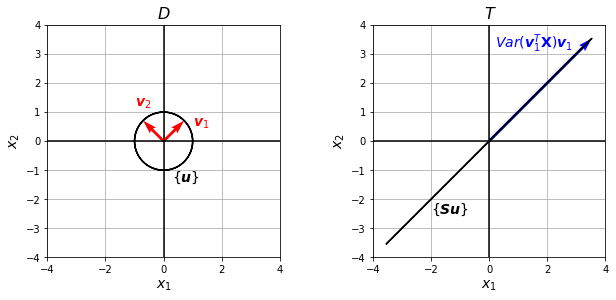

In [29]:
theta = np.linspace(-2*np.pi, 2*np.pi, 1000)
xi = np.cos(theta)
yi = np.sin(theta)

d = np.vstack((xi, yi))

S = np.cov(points1.T)
lam, v = LA.eig(S)

t = S @ d  # Vectors in t are the transformed vectors of d

origin = [0], [0] # origin point
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting D
ax1.plot(d[0,:], d[1,:], color='black')
ax1.quiver(*origin, v[0,0], v[1,0], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, v[0,1], v[1,1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('$x_1$', fontsize=14)
ax1.set_ylabel('$x_2$', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("D",style='italic',  fontsize=16)
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.5, "$\mathregular{v}_1$", color='r', fontsize=14, weight="bold", style="italic")
ax1.text(-1, 1.2, "$\mathregular{v}_2$", color='r', fontsize=14, weight="bold", style="italic")
ax1.text(0.3, -1.4, "$\{\mathregular{u}\}$", color='black', fontsize=14, weight="bold", style="italic")

# Plotting T
ax2.plot(t[0, :], t[1, :], color='black')
ax2.quiver(*origin, lam[0] * v[0,0], lam[0] * v[1,0], color=['blue'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, lam[1] * v[0,1], lam[1] * v[1,1], color=['blue'], width=0.012, angles='xy', scale_units='xy', scale=1)

ax2.set_xlabel('$x_1$', fontsize=14)
ax2.set_ylabel('$x_2$', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("T",style='italic',  fontsize=16)
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(0.2, 3.2, "$Var(\mathregular{v}_1^T\mathbf{X})\mathregular{v}_1$",
         color='blue', fontsize=14, weight="bold", style="italic")
ax2.text(-2, -2.5, "$\{\mathregular{Su}\}$", color='black', fontsize=14, weight="bold", style="italic")

plt.show()

In [30]:
points1 - points1.mean(axis=0)

array([[-2., -2.],
       [-1., -1.],
       [ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  2.]])

In [31]:
points3 = np.array([[1,5,3],
                    [3,2,7]])
S = np.cov(points3.T)
LA.eig(S)

(array([ 0. , 14.5,  0. ]),
 array([[-9.28476691e-01, -3.71390676e-01,  1.53134210e-17],
        [-2.22834406e-01,  5.57086015e-01,  8.00000000e-01],
        [ 2.97112541e-01, -7.42781353e-01,  6.00000000e-01]]))

### PCA using SVD

In [32]:
np.random.seed(0)
mu = [2, 2]
Sigma = [[6, 4],
         [4, 6]]
points = np.random.multivariate_normal(mu, Sigma, 150)
pca = PCA(n_components=2)
pca.fit(points)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
pca.explained_variance_

array([10.24723443,  1.96099192])

In [34]:
sigma = pca.singular_values_
sigma

array([39.07477357, 17.09350158])

In [35]:
sigma ** 2 / (150 - 1)

array([10.24723443,  1.96099192])

### MINIST Dataset

In [36]:
Xtil, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [37]:
print(Xtil.shape)
print(y.shape)

(70000, 784)
(70000,)


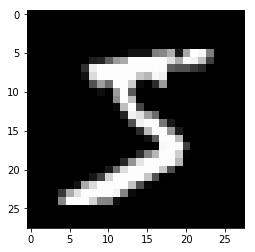

In [38]:
plt.imshow(Xtil[0].reshape(28, 28), cmap='gray') 
plt.show()

In [39]:
y[0]

'5'

In [40]:
Xtil /= 255

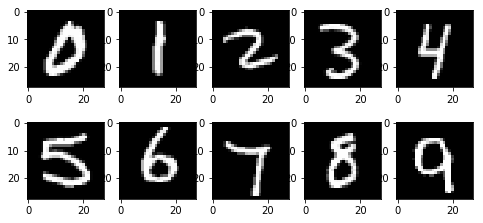

In [41]:
indices = np.argsort(y)
num_cols = 5

fig, axes = plt.subplots(2, num_cols, figsize=(8,4))
plt.subplots_adjust(wspace=0.2, hspace=0.05)

for i in range(10):
    axes[i // num_cols, i % num_cols].imshow(Xtil[indices[i*7500]].reshape(28, 28), cmap='gray')   
    
plt.show()

In [42]:
pca = PCA().fit(Xtil)

In [43]:
len(pca.explained_variance_[pca.explained_variance_ <= 1e-15])

71

In [44]:
784-71

713

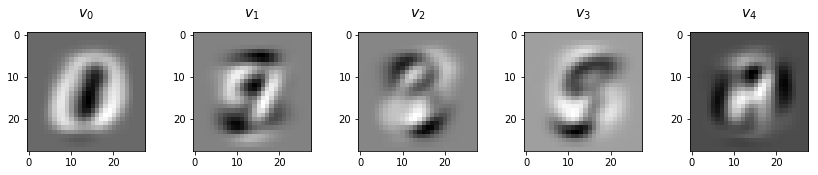

In [45]:
fig, axes = plt.subplots(1, 5, figsize=(14, 8))
plt.subplots_adjust(wspace=0.4)

for i in range(5):
    axes[i].imshow(pca.components_[i, :].reshape(28, 28), cmap='gray')
    axes[i].set_title(r"$v_"+str(i)+"$", y=1.08, fontsize=14)

plt.show()

In [46]:
coordinates = pca.transform(Xtil)

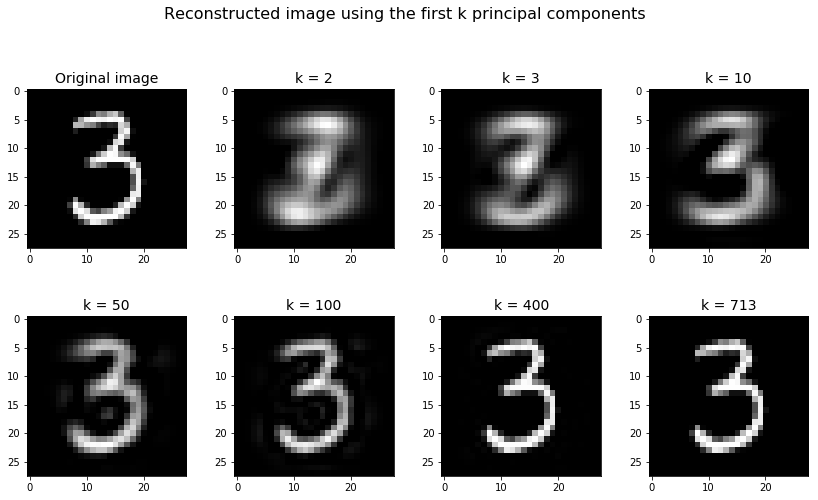

In [47]:
num_eigv = [2, 3, 10, 50, 100, 400, 713]
num_cols = 4

fig, axes = plt.subplots(2, num_cols, figsize=(14, 8))
fig.suptitle("Reconstructed image using the first k principal components", fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.1)

axes[0, 0].imshow(Xtil[50, :].reshape(28, 28), cmap='gray')   
axes[0, 0].set_title("Original image", fontsize=14)

for i in range(1, 8):
    rec_vec = np.sum(coordinates[50, :num_eigv[i-1]].reshape(-1, 1) * pca.components_[:num_eigv[i-1], :], axis = 0) + pca.mean_
    rec_vec[rec_vec < 0] = 0
    axes[i // num_cols, i % num_cols].imshow(rec_vec.reshape(28, 28), cmap='gray')
    axes[i // num_cols, i % num_cols].set_title("k = {}".format(num_eigv[i-1]), fontsize=14)
    
plt.show()

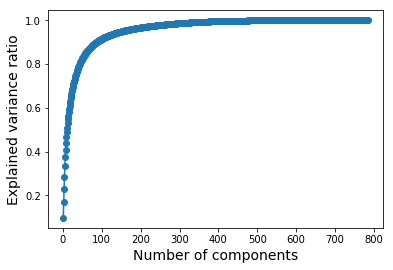

In [48]:
plt.plot(range(1, 785), np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.xlabel('Number of components', fontsize=14)
plt.ylabel('Explained variance ratio', fontsize=14)

plt.show()

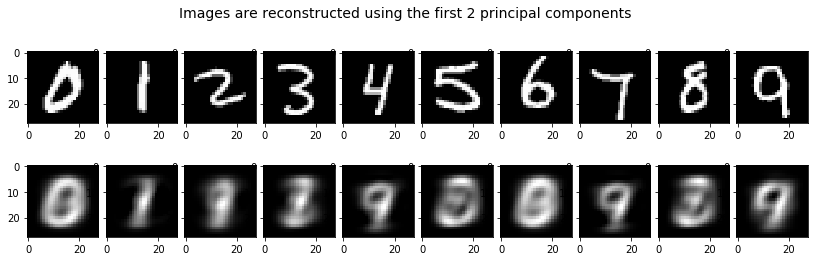

In [49]:
indices = np.argsort(y)
num_cols = 10

fig, axes = plt.subplots(2, 10, figsize=(14, 4))
fig.suptitle("Images are reconstructed using the first 2 principal components", fontsize=14)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(num_cols):
    axes[0, i % num_cols].imshow(Xtil[indices[i*7500], :].reshape(28, 28), cmap='gray')  
    rec_vec = np.sum(coordinates[indices[i*7500], :2].reshape(-1, 1) * pca.components_[:2, :], axis = 0) + pca.mean_
    rec_vec[rec_vec < 0] = 0
    axes[1, i % num_cols].imshow(rec_vec.reshape(28, 28), cmap='gray')
    
plt.show()

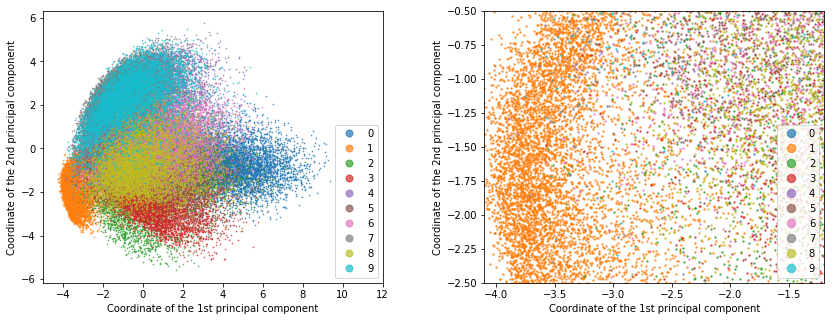

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
plt.subplots_adjust(wspace=0.3)

data_points = pd.DataFrame({"X Value": coordinates[:, 0], "Y Value": coordinates[:, 1], "Category": y})

groups = data_points.groupby("Category")
for name, group in groups:
    ax1.plot(group["X Value"], group["Y Value"], marker="o", linestyle="", label=name, alpha=0.7, markersize=0.7)

ax1.set_xlim([-5, 12])
ax1.set_xlabel("Coordinate of the 1st principal component")
ax1.set_ylabel("Coordinate of the 2nd principal component")
ax1.legend(loc="lower right", markerscale=10)

groups = data_points.groupby("Category")
for name, group in groups:
    ax2.plot(group["X Value"], group["Y Value"], marker="o", linestyle="", label=name, alpha=0.7, markersize=1.4)

ax2.set_xlim([-4.1, -1.2])
ax2.set_ylim([-2.5, -0.5])
ax2.set_xlabel("Coordinate of the 1st principal component")
ax2.set_ylabel("Coordinate of the 2nd principal component")
ax2.legend(loc="lower right", markerscale=6)

plt.show()

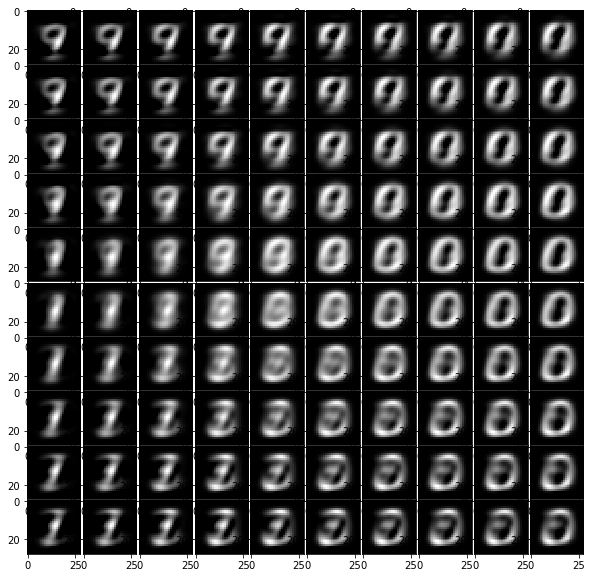

In [51]:
num_cols = 10
fig, axes = plt.subplots(num_cols, num_cols, figsize=(10, 10))
plt.subplots_adjust(wspace=0.02, hspace=0.02)

for (num_i, i) in enumerate(np.linspace(-4, 8, num_cols)):
    for (num_j, j) in enumerate(np.linspace(-5, 5, num_cols)):
        rec_vec = i*pca.components_[0, :] + j*pca.components_[1, :] + pca.mean_
        rec_vec[rec_vec < 0] = 0
        axes[(num_cols - 1) - num_j, num_i].imshow(rec_vec.reshape(28, 28), cmap='gray')
    
plt.show()

### Removing noise using PCA

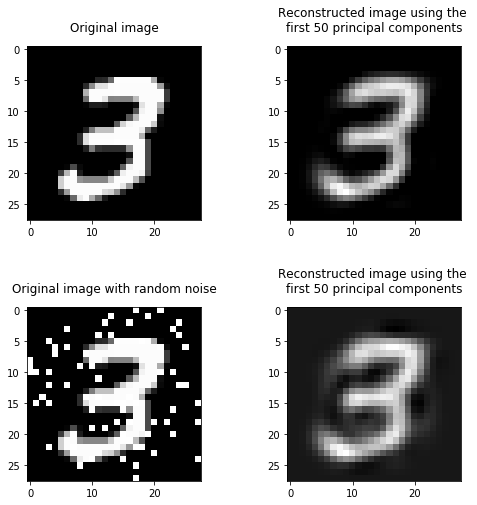

In [52]:
np.random.seed(250)
num_eigv = 50
index = 7
sample_img = Xtil[index, :].copy()
# Adding noise
noise = np.random.rand(sample_img.shape[0])
sample_img[noise > 0.9] = 1

rec_vec = np.sum(coordinates[index, :num_eigv].reshape(-1, 1) * pca.components_[:num_eigv, :], axis = 0) + pca.mean_
rec_vec[rec_vec < 0] = 0

new_coordinates = pca.transform(sample_img.reshape(1, -1))

rec_noisy_vec = np.sum(new_coordinates[0, :num_eigv].reshape(-1, 1) * pca.components_[:num_eigv, :], axis = 0) + pca.mean_
rec_noisy_vec[rec_vec < 0] = 0

fig, axes = plt.subplots(2, 2, figsize=(8,8))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

axes[0, 0].imshow(Xtil[index, :].reshape(28, 28), cmap='gray')
axes[0, 0].set_title("Original image", y=1.05)

axes[0, 1].imshow(rec_vec.reshape(28, 28), cmap='gray')
axes[0, 1].set_title("Reconstructed image using the \nfirst {} principal components".format(num_eigv), y=1.05)

axes[1, 0].imshow(sample_img.reshape(28, 28), cmap='gray')
axes[1, 0].set_title("Original image with random noise", y=1.05)

axes[1, 1].imshow(rec_noisy_vec.reshape(28, 28), cmap='gray')
axes[1, 1].set_title("Reconstructed image using the \nfirst {} principal components".format(num_eigv), y=1.05)

plt.show()

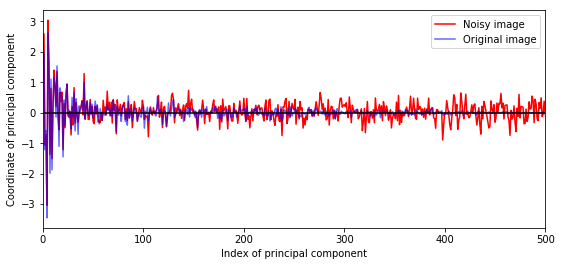

In [53]:
fig = plt.figure(figsize=(9,4))

plt.plot(range(1, 785), new_coordinates[0, :], color='red', label='Noisy image')
plt.plot(range(1, 785), coordinates[index, :], color='blue', label='Original image', alpha =0.6)
plt.legend(loc="upper right")
plt.xlabel("Index of principal component")
plt.ylabel("Coordinate of principal component")
plt.axhline(y=0, color='k')
plt.xlim([0, 500])

plt.show()

### Normal distribution 

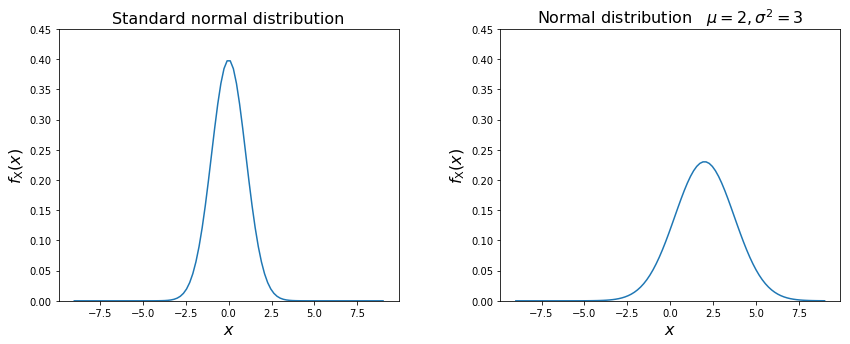

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
plt.subplots_adjust(wspace=0.3)

mu = 0
variance = 1
sigma = mt.sqrt(variance)
x = np.linspace(mu - 9*sigma, mu + 9*sigma, 100)
ax1.plot(x, stats.norm.pdf(x, mu, sigma))
ax1.set_xlabel("$x$", fontsize= 16, style="italic")
ax1.set_ylabel("$f_\mathrm{X}(x)$", fontsize= 16, style="italic")
ax1.set_ylim([0, 0.45])
ax1.set_title("Standard normal distribution", fontsize= 16)

mu1 = 2
variance1 = 3
sigma1 = mt.sqrt(variance1)
x = np.linspace(mu - 9*sigma, mu + 9*sigma, 100)
ax2.plot(x, stats.norm.pdf(x, mu1, sigma1))
ax2.set_xlabel("$x$", fontsize= 16, style="italic")
ax2.set_ylabel("$f_\mathrm{X}(x)$", fontsize= 16)
ax2.set_ylim([0, 0.45])
ax2.set_title("Normal distribution   $ \mu=2, \sigma^2=3$", fontsize= 16)

plt.show()

## Multivariate normal distribution

### Sampling from MVN

In [55]:
np.random.seed(0)
mu = [2, 2]
Sigma = [[6, 4],
         [4, 6]]
points = np.random.multivariate_normal(mu, Sigma, 150)
np.round(np.cov(points.T), 2)

array([[5.82, 4.13],
       [4.13, 6.39]])

In [56]:
np.random.seed(0)
points = np.random.multivariate_normal(mu, Sigma, 30000)
np.round(np.cov(points.T), 2)

array([[6.03, 4.02],
       [4.02, 5.96]])

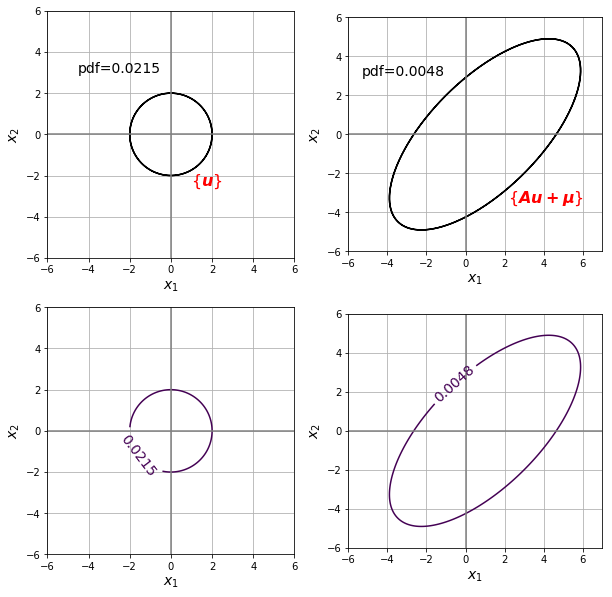

In [57]:
x = np.linspace(-6,6,500)
y = np.linspace(-6,6,500)
X,Y = np.meshgrid(x,y)

theta = np.linspace(-2*np.pi, 2*np.pi, 1000)
xi = np.cos(theta)
yi = np.sin(theta)

d = 2 * np.vstack((xi, yi))

pos = np.array([X.flatten(),Y.flatten()]).T

mu1 =np.array([[0], [0]])
S1 = np.array([[1, 0],
               [0, 1]])

mu2 =np.array([[1], [0]])
S2 = np.array([[6, 4],
               [4, 6]])

lam, V = LA.eig(S2)
A = V @ np.sqrt(np.diag(lam)) @ V.T

t = A @ d + mu2

n=2
c=2
pdf1 = 1/(2*mt.pi)**(n/2) * mt.exp(-c**2/2)
pdf2 = pdf1 / mt.sqrt(np.linalg.det(S2))

rv1 = multivariate_normal(mu1.flatten(), S1)
rv2 = multivariate_normal(mu2.flatten(), S2)

origin = [0], [0] # origin point
fig, axes = plt.subplots(2, 2, figsize=(10,10))

plt.subplots_adjust(wspace=0.2)

axes[0,0].plot(d[0,:], d[1,:], color='black')
axes[0,0].set_xlabel("$x_1$", fontsize=14)
axes[0,0].set_ylabel("$x_2$", fontsize=14)
axes[0,0].set_xlim([-6,6])
axes[0,0].set_ylim([-6,6])
axes[0,0].set_aspect('equal')
axes[0,0].grid(True)
axes[0,0].set_axisbelow(True)
axes[0,0].axhline(y=0, color='grey')
axes[0,0].axvline(x=0, color='grey')
axes[0,0].text(-4.5, 3, "pdf={}".format(round(pdf1, 4)), fontsize=14)
axes[0,0].text(1, -2.5, "$\{\mathregular{u}\}$",color='r', fontsize=16, weight="bold", style="italic")


axes[0,1].plot(t[0, :], t[1, :], color='black')
axes[0,1].set_xlabel("$x_1$", fontsize=14)
axes[0,1].set_ylabel("$x_2$", fontsize=14)
axes[0,1].set_xlim([-6,7])
axes[0,1].set_ylim([-6,6])
axes[0,1].set_aspect('equal')
axes[0,1].grid(True)
axes[0,1].set_axisbelow(True)
axes[0,1].axhline(y=0, color='grey')
axes[0,1].axvline(x=0, color='grey')
axes[0,1].text(-5.3, 3, "pdf={}".format(round(pdf2, 4)), fontsize=14)
axes[0,1].text(2.2, -3.5, "$\{\mathregular{Au+\mu}\}$",color='r', fontsize=16, weight="bold", style="italic")

contours1 = axes[1, 0].contour(X, Y, rv1.pdf(pos).reshape(500,500), levels=[pdf1])
contours2 = axes[1, 1].contour(X, Y, rv2.pdf(pos).reshape(500,500), levels = [pdf2])

axes[1, 0].clabel(contours1, inline=True, fontsize=14, fmt='%1.4f')
axes[1, 0].axhline(y=0, color='gray')
axes[1, 0].axvline(x=0, color='gray')
axes[1, 0].set_xlabel("$x_1$", fontsize=14)
axes[1, 0].set_ylabel("$x_2$", fontsize=14)
axes[1,0].set_aspect('equal')
axes[1, 0].set_xlim([-6,6])
axes[1, 0].set_ylim([-6,6])
axes[1, 0].grid(True)

axes[1, 1].clabel(contours2, inline=True, fontsize=14, fmt='%1.4f')
axes[1, 1].axhline(y=0, color='gray')
axes[1, 1].axvline(x=0, color='gray')
axes[1, 1].set_xlabel("$x_1$", fontsize=14)
axes[1, 1].set_ylabel("$x_2$", fontsize=14)
axes[1, 1].set_aspect('equal')
axes[1, 1].set_xlim([-6,7])
axes[1, 1].set_ylim([-6,6])
axes[1, 1].grid(True)

plt.show()

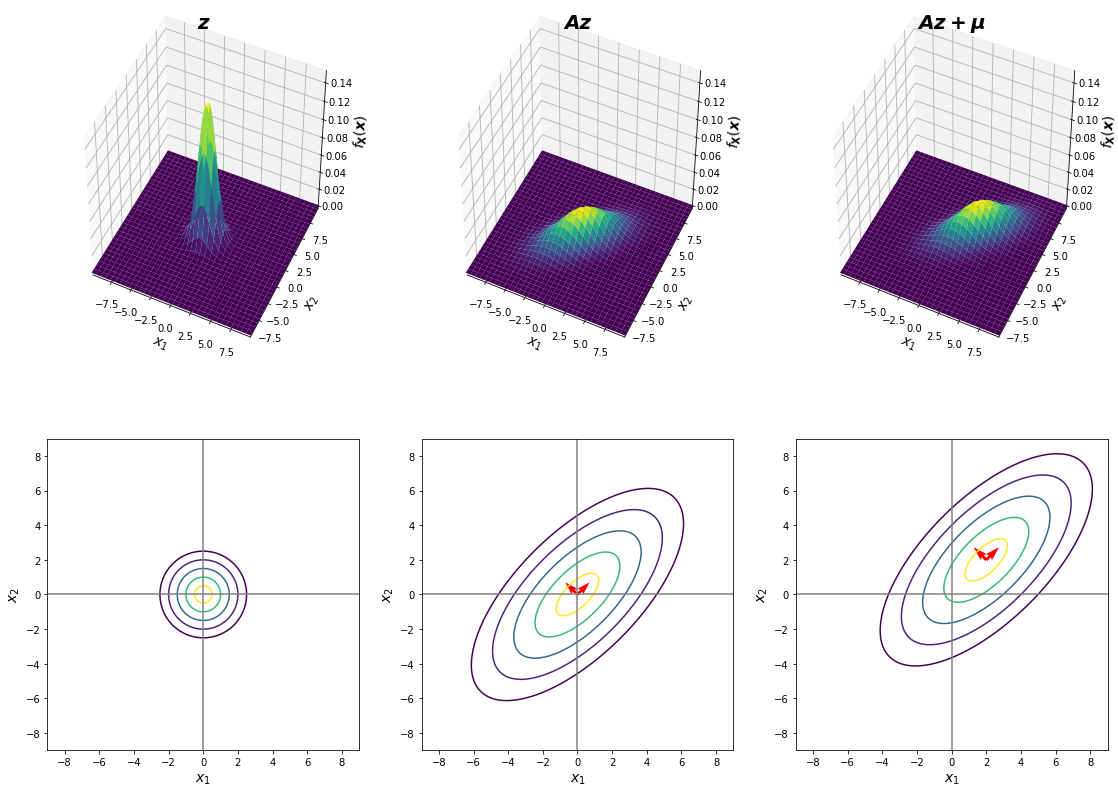

In [58]:
N = 100
x = np.linspace(-10, 10, N)
y = np.linspace(-10, 10, N)
X, Y = np.meshgrid(x, y)

# Mean vector and covariance matrix
mu = np.array([0, 0])
mu1 = np.array([2, 2])

Sigma = np.array([[1, 0],
                  [0, 1]])

Sigma1 = np.array([[6, 4],
                   [4, 6]])

lam, v = LA.eig(Sigma1)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
Z = multivariate_normal(mu, Sigma).pdf(pos).reshape(N, N)
Z1 = multivariate_normal(mu, Sigma1).pdf(pos).reshape(N, N)
Z2 = multivariate_normal(mu1, Sigma1).pdf(pos).reshape(N, N)

x1 = np.linspace(-9, 9, 500)
y1 = np.linspace(-9, 9, 500)
X1, Y1 = np.meshgrid(x1, y1)

pos = np.array([X1.flatten(), Y1.flatten()]).T

rv1 = multivariate_normal(mu, Sigma)
rv2 = multivariate_normal(mu, Sigma1)
rv3 = multivariate_normal(mu1, Sigma1)

zlevels = [rv1.pdf([[i,0]]) for i in np.arange(2.5, 0, -0.5)]
xlevels = [rv1.pdf([[i,0]])/ mt.sqrt(np.linalg.det(Sigma1)) for i in np.arange(2.5, 0, -0.5)]


fig = plt.figure(figsize=(19, 14))
plt.subplots_adjust(wspace = 0.2)

ax1 = fig.add_subplot(231, projection='3d')
ax2 = fig.add_subplot(232, projection='3d')
ax3 = fig.add_subplot(233, projection='3d')
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

#Plot 1
ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

ax1.view_init(45, -65)
ax1.set_xlabel("$x_1$", fontsize=14)
ax1.set_ylabel("$x_2$", fontsize=14, labelpad= 9)
ax1.set_zlabel("$f_\mathbf{X}(\mathregular{x})$", fontsize=14, weight="bold", style="italic", labelpad= 9)
ax1.set_xlim([-9.5, 9.5])
ax1.set_ylim([-9.5, 9.5])
ax1.set_zlim([0, 0.15])
ax1.set_title("z", weight="bold", style="italic", fontsize=20)

#Plot 2
ax2.plot_surface(X, Y, Z1, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

ax2.view_init(45, -65)
ax2.set_xlabel("$x_1$", fontsize=14)
ax2.set_ylabel("$x_2$", fontsize=14 ,labelpad= 9)
ax2.set_zlabel("$f_\mathbf{X}(\mathregular{x})$", fontsize=14, weight="bold", style="italic", labelpad= 9)
ax2.set_xlim([-9.5, 9.5])
ax2.set_ylim([-9.5, 9.5])
ax2.set_zlim([0, 0.15])
ax2.set_title("Az", weight="bold", style="italic", fontsize=20)

#Plot 3
ax3.plot_surface(X, Y, Z2, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

ax3.view_init(45, -65)
ax3.set_xlabel("$x_1$", fontsize=14)
ax3.set_ylabel("$x_2$", fontsize=14 ,labelpad= 9)
ax3.set_zlabel("$f_\mathbf{X}(\mathregular{x})$", fontsize=14, weight="bold", style="italic", labelpad= 9)
ax3.set_xlim([-9.5, 9.5])
ax3.set_ylim([-9.5, 9.5])
ax3.set_zlim([0, 0.15])
ax3.set_title("$\mathregular{Az+\mu}$", weight="bold", style="italic", fontsize=20)

#Plot 4
contours1 = ax4.contour(X1, Y1, rv1.pdf(pos).reshape(500,500), levels = zlevels)
ax4.axhline(y=0, color='gray')
ax4.axvline(x=0, color='gray')
ax4.set_xlabel("$x_1$", fontsize=14)
ax4.set_ylabel("$x_2$", fontsize=14)
ax4.set_aspect('equal')


#Plot 5
contours2 = ax5.contour(X1, Y1, rv2.pdf(pos).reshape(500,500), levels= xlevels)
ax5.quiver(*origin, v[0,0], v[1,0], color=['r'], width=0.0085, angles='xy', scale_units='xy', scale=1)
ax5.quiver(*origin, v[0,1], v[1,1], color=['r'], width=0.0085, angles='xy', scale_units='xy', scale=1)
ax5.axhline(y=0, color='gray')
ax5.axvline(x=0, color='gray')
ax5.set_xlabel("$x_1$", fontsize=14)
ax5.set_ylabel("$x_2$", fontsize=14)
ax5.set_aspect('equal')

#Plot 6
contours3 = ax6.contour(X1, Y1, rv3.pdf(pos).reshape(500,500), levels = xlevels)
ax6.quiver(*origin+mu1, v[0,0], v[1,0], color=['r'], width=0.0085, angles='xy', scale_units='xy', scale=1)
ax6.quiver(*origin+mu1, v[0,1], v[1,1], color=['r'], width=0.0085, angles='xy', scale_units='xy', scale=1)
ax6.axhline(y=0, color='gray')
ax6.axvline(x=0, color='gray')
ax6.set_xlabel("$x_1$", fontsize=14)
ax6.set_ylabel("$x_2$", fontsize=14)
ax6.set_aspect('equal')

plt.show()

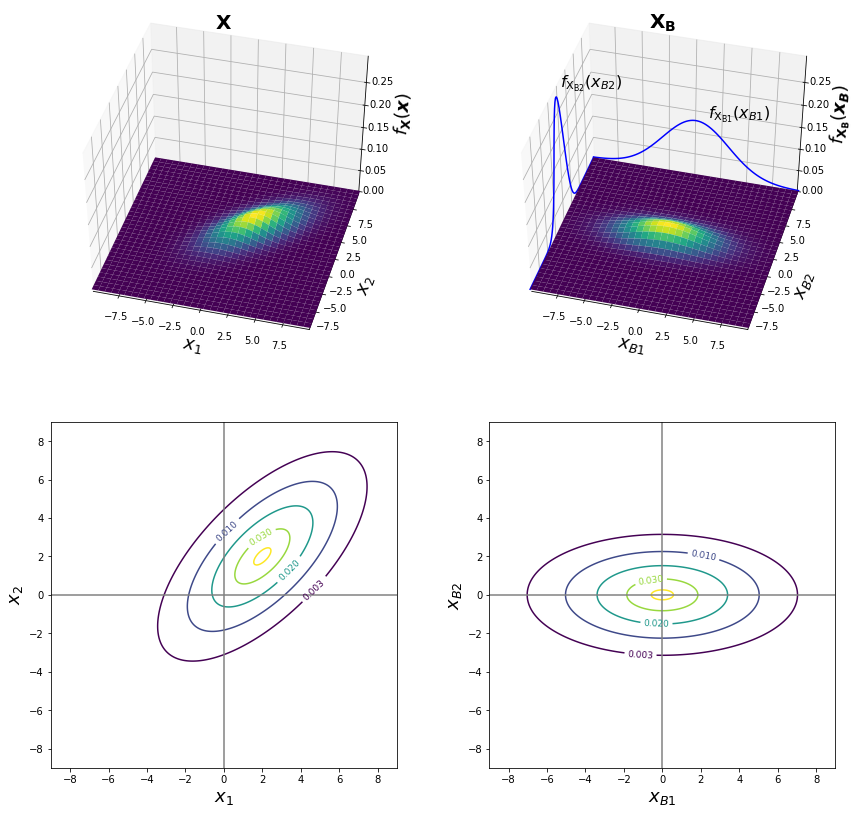

In [59]:
N = 100
x1 = np.linspace(-10, 10, N)
y1 = np.linspace(-10, 10, N)
X1, Y1 = np.meshgrid(x1, y1)

# Mean vector and covariance matrix
mu1 = np.array([2, 2])
Sigma1 = np.array([[6, 4],
                   [4, 6]])

lam, v = LA.eig(Sigma1)
mu2 = np.array([0, 0])
Sigma2 = np.diag(lam)

ystd1= stats.norm.pdf(x1, 0, mt.sqrt(lam[0]))
ystd2= stats.norm.pdf(x1, 0, mt.sqrt(lam[1]))

pos = np.empty(X1.shape + (2,))
pos[:, :, 0] = X1
pos[:, :, 1] = Y1
Z1 = multivariate_normal(mu1, Sigma1).pdf(pos).reshape(N, N)
Z2 = multivariate_normal(mu2, Sigma2).pdf(pos).reshape(N, N)

x2 = np.linspace(-9, 9, 500)
y2 = np.linspace(-9, 9, 500)
X2, Y2 = np.meshgrid(x2, y2)

pos = np.array([X2.flatten(), Y2.flatten()]).T

rv1 = multivariate_normal(mu1, Sigma1)
rv2 = multivariate_normal(mu2, Sigma2)

fig = plt.figure(figsize=(15, 14))
plt.subplots_adjust(wspace = 0.1)

ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot_surface(X1, Y1, Z1, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

ax1.view_init(45, -75)
ax1.set_xlabel("$x_1$", fontsize=18)
ax1.set_ylabel("$x_2$", fontsize=18, labelpad= 9)
ax1.set_zlabel("$f_\mathbf{X}(\mathregular{x})$", fontsize=18, weight="bold", style="italic", labelpad= 9)
ax1.set_xlim([-9.5, 9.5])
ax1.set_ylim([-9.5, 9.5])
ax1.set_zlim([0, 0.3])
ax1.set_title("$\mathbf{X}$", weight="bold", style="italic", fontsize=20)

ax2.plot_surface(X1, Y1, Z2, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
ax2.plot(x1, x1*0+10, ystd1, color = 'blue')
ax2.plot(x1*0-10, x1, ystd2, color = 'blue')

ax2.view_init(45, -75)
ax2.set_xlabel("$x_{B1}$", fontsize=18)
ax2.set_ylabel("$x_{B2}$", fontsize=18 ,labelpad= 9)
ax2.set_zlabel("$f_\mathbf{X_B}(\mathregular{x_B})$", fontsize=18, weight="bold", style="italic", labelpad= 9)
ax2.set_xlim([-9.5, 9.5])
ax2.set_ylim([-9.5, 9.5])
ax2.set_zlim([0, 0.3])
ax2.set_title("$\mathbf{X_B}$", weight="bold", style="italic", fontsize=20)
ax2.text(5, -6, 0.38,"$f_\mathrm{X_{B1}}(x_{B1})$", fontsize= 16)
ax2.text(-8.5, -3, 0.35, "$f_\mathrm{X_{B2}}(x_{B2})$", fontsize= 16)

contours1 = ax3.contour(X2, Y2, rv1.pdf(pos).reshape(500,500), levels = [0.003, 0.01, 0.02, 0.03, 0.035])
contours2 = ax4.contour(X2, Y2, rv2.pdf(pos).reshape(500,500), levels= [0.003, 0.01, 0.02, 0.03, 0.035])

ax3.clabel(contours1, inline=True, fontsize=9)

ax3.axhline(y=0, color='gray')
ax3.axvline(x=0, color='gray')
ax3.set_xlabel("$x_1$", fontsize=18)
ax3.set_ylabel("$x_2$", fontsize=18)
ax3.set_aspect('equal')

ax4.clabel(contours2, inline=True, fontsize=9)
ax4.axhline(y=0, color='gray')
ax4.axvline(x=0, color='gray')
ax4.set_xlabel("$x_{B1}$", fontsize=18)
ax4.set_ylabel("$x_{B2}$", fontsize=18)
ax4.set_aspect('equal')

plt.show()

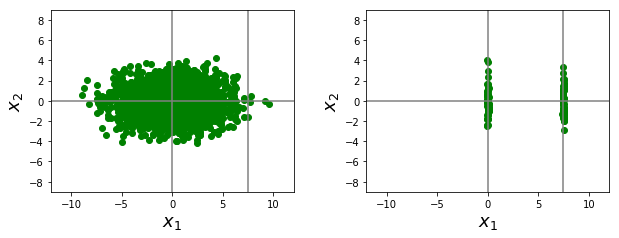

In [60]:
np.random.seed(10)

mu = np.array([0, 0])
Sigma = np.array([[7, 0],
                  [0, 2]])
points = np.random.multivariate_normal(mu, Sigma, 2500)

points1 = np.random.multivariate_normal(mu, Sigma, 100000)
points_x5 = points1[(7.4 < points1[: ,0]) & (points1[: ,0] < 7.6), :]
points_x0 = points1[(-0.1 < points1[: ,0]) & (points1[: ,0] < 0.1), :][:len(points_x5), :]

x1, y1 = points.T
x2, y2 = points_x0.T
x3, y3 = points_x5.T


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
plt.subplots_adjust(wspace=0.3)

ax1.scatter(x1, y1, color='green')
ax1.axvline(x=0, color='grey')
ax1.axvline(x=7.5, color='grey')
ax1.axhline(y=0, color='grey')

ax1.set_xlabel("$x_1$", fontsize= 18, style="italic")
ax1.set_ylabel("$x_2$", fontsize= 18, style="italic")
ax1.set_aspect('equal')
ax1.set_xlim([-12, 12])
ax1.set_ylim([-9, 9])

ax2.scatter(x2, y2, color='green')
ax2.scatter(x3, y3, color='green')
ax2.axvline(x=0, color='grey')
ax2.axvline(x=7.5, color='grey')
ax2.axhline(y=0, color='grey')

ax2.set_xlabel("$x_1$", fontsize= 18, style="italic")
ax2.set_ylabel("$x_2$", fontsize= 18, style="italic")
ax2.set_aspect('equal')
ax2.set_xlim([-12, 12])
ax2.set_ylim([-9, 9])

plt.show()

### Where PCA fails?

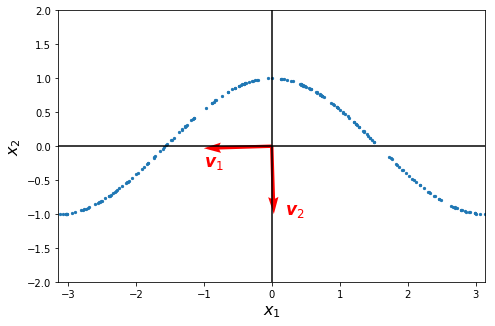

In [61]:
np.random.seed(0)
fig = plt.figure(figsize=(8, 5))

x = np.random.uniform(-np.pi, np.pi, 200)
y = np.cos(x) 

Xtil = np.column_stack((x, y))

pca = PCA(n_components=2)
pca.fit(Xtil)

plt.scatter(x, y, s = 5)
plt.quiver(*origin,  pca.components_[0,0], pca.components_[0,1], color=['red'], width=0.008, angles='xy', scale_units='xy', scale=1)
plt.quiver(*origin,  pca.components_[1,0], pca.components_[1,1], color=['red'], width=0.008, angles='xy', scale_units='xy', scale=1)

plt.xlim([-np.pi, np.pi])
plt.ylim([-2, 2])
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.gca(). set_aspect('equal')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.text(-1, -0.3, "$\mathregular{v}_1$", color='r', fontsize=17, weight="bold", style="italic")
plt.text(0.2, -1, "$\mathregular{v}_2$", color='r', fontsize=17, weight="bold", style="italic")

plt.show()